# Predicting heart disease using machinge learning 
    this notedbook looks into using various python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting wether or not someone has heart disease based on their medical attributes. 
    
    We are going to take the following approach: 
    1. Problem definition 
    2. Data
    3. Evaluation 
    4. Features
    5. Modelling
    6. Experimentation
    

## 1. Problem Definition 
    >Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
    > Our data comes from UCI Machine Learning Repository, Heart Disease Data Set, 
    https://archive.ics.uci.edu/dataset/45/heart+disease
    but the CSV version came from Kaggle
    https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci
    
## 3. Evaluation
    if we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept we'll puruse the project. 

## 4. Features
    This is where we will get different information about the features of your data
    **Create a Data Dictionary**
    age: age in years
    sex: sex (1 = male; 0 = female)
    cp: chest pain type
    -- Value 0: typical angina
    -- Value 1: atypical angina
    -- Value 2: non-anginal pain
    -- Value 3: asymptomatic
    trestbps: resting blood pressure (in mm Hg on admission to the hospitalchol: serum cholestoral in mg/dl
    fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    chol- serum cholesterol in mg/dl
    --serum = LDL + HDL + .2 * triglyceride
    --above 200 is a convern
    restecg: resting electrocardiographic results
    -- Value 0: normal
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    thalach: maximum heart rate achieved
    exang: exercise induced angina (1 = yes; 0 = no)
    oldpeak = ST depression induced by exercise relative to rest
    slope: the slope of the peak exercise ST segment
    -- Value 0: upsloping
    -- Value 1: flat
    -- Value 2: downsloping
    ca: number of major vessels (0-3) colored by flourosopy
    thal: 0 = normal; 1 = fixed defect; 2 = reversable defect 
    and the label
    condition: 0 = no disease, 1 = disease






## Preparing the tools

we are going to use pandas, Matplotlib, and NumPy for data analysis and manipulation

In [1]:
#Imort all the tools we need

#Regular Exploritory Data Analysis (EDA) and Plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 
#we want the plots to appear inside of the jupyter notebook

#Models from Scikit-Learn THese are chosen from sklearn map, we are working with classification, yes or no
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay





## Load the data 

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape #This will show us the number of rows and the columns in our dataframe

(303, 14)

## Data Exploration or Exporatory Data Analysis (EDA)

In [3]:
#No set way to do this, you just simply try to become more and more familiar with our data.  Essentially you want to be a subject 
#matter specialist about your data.


##### Lets look at a few things that will help guide us:
    1. What questions are we trying to solve?
    2. What kind of data do we have and how do we treat different types of data? (Numerical, Categorical)
    3. What is missing from out data set and how are we going to take care of it?
    4. Are there any outliers, how do they influence the data, and do we need to adress them in any way?
    5. Can you add, change , or remove any features to get more out of your data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
# Let's see how many of each class we have, 1 being yes they have it and 0 no they do not.
df["target"].value_counts()


target
1    165
0    138
Name: count, dtype: int64

In [9]:
#we have similar numbers in each, making this a very balanced problem. 

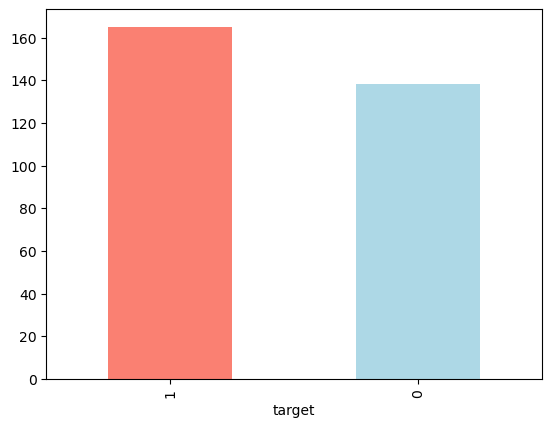

In [11]:
df["target"].value_counts().plot(kind="bar", color = ["salmon","lightblue"]);

In [13]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
# Is there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Let's work on finding different patterns in our data

### Heart disease Frequency according to Sex

In [18]:
df.sex.value_counts()
# if we look at our dictionary 1 = male and 0 = female 

sex
1    207
0     96
Name: count, dtype: int64

In [21]:
#hmm interesting seems a little tilted one way, lets crosstabe to compare
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [22]:
#total women is 96 roughly 100, and 72 have heart disease so around 72 percent of women from our study had hear disease.
#If we look at total men there is about 207, and around half have heart disease so 72 percent of women and 50 percent of our men,
#so despite what the the value counts shows based on the data we have looked at woman might be more likley to have it, lets explore more

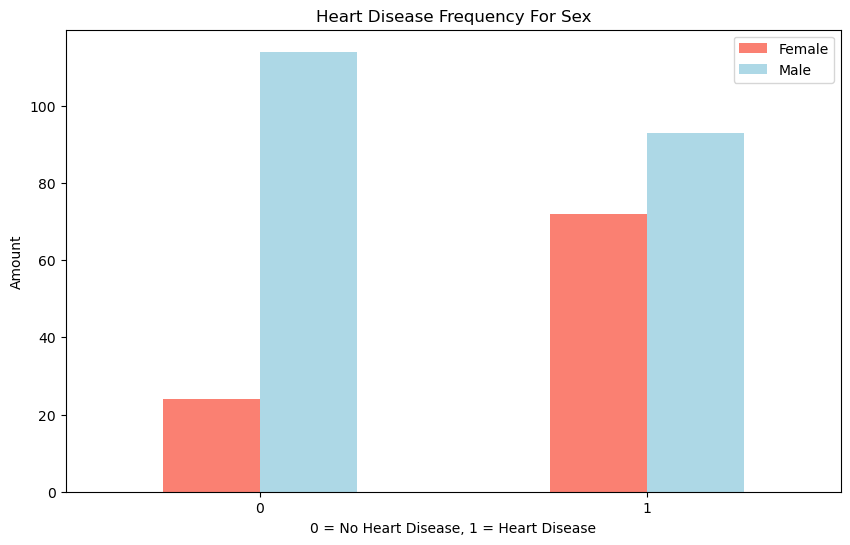

In [38]:
#lets create a plot
pd.crosstab(df.target,df.sex).plot(kind="bar", 
            figsize = (10,6), color = ["salmon", "lightblue"])
plt.title("Heart Disease Frequency For Sex")
plt.xlabel("0 = No Heart Disease, 1 = Heart Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation='horizontal');


In [26]:
#looking at this visually you can see if we were to compare the male bars to eachother and the female bars to eachother, there is a 3/4 chance
#of a female at random having heart disease.

### Heart Disease Frequency according to number of major vessels colored by flourosopy/ coronary angiography(ca)

In [40]:
df.ca.value_counts()

ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64

In [41]:
pd.crosstab(df.ca,df.target)

target,0,1
ca,,
0,45,130
1,44,21
2,31,7
3,17,3
4,1,4


In [42]:
#Hmm looking at the above data, more had zero vessels colored, but when compared to the target we can roughly see 
# 0 2/3 had heart disease
# 1 1/2 had heart disease
# 2 1/4 had heart disease
# 3 1/6 had heart disease
# 4 4/5 had heart disease
#lets look at this visually.


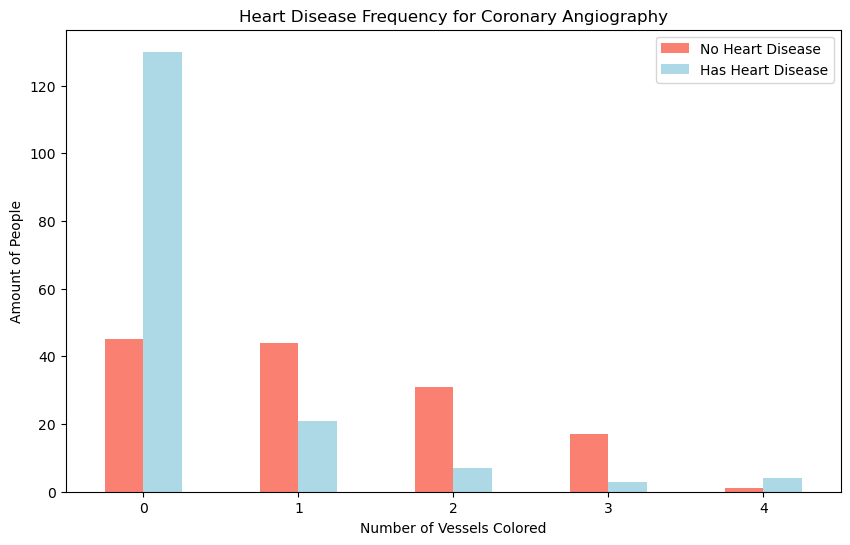

In [50]:
pd.crosstab(df.ca,df.target).plot(kind = "bar", 
                                 figsize = (10,6),color = ["salmon", "Lightblue"])
plt.title("Heart Disease Frequency for Coronary Angiography")
plt.xlabel("Number of Vessels Colored")
plt.ylabel("Amount of People")
plt.legend(["No Heart Disease", "Has Heart Disease"])
plt.xticks(rotation="horizontal");
                                 

### Age Vs Max Heart Rate For Heart Disease

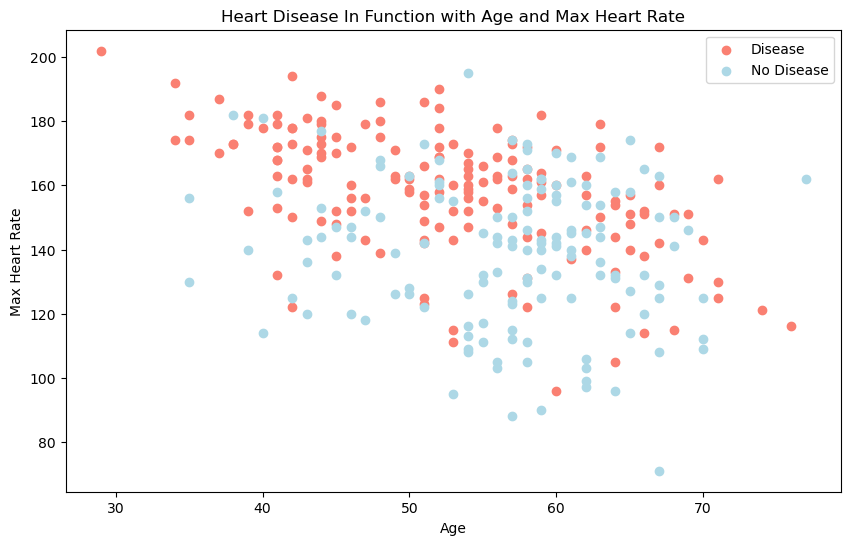

In [59]:
#create a plot
plt.figure(figsize=(10,6))

#lets look at positive examples first
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color = "salmon")

#Lets look at negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            color = "lightblue");

#Let's make it a little more descriptive
plt.title("Heart Disease In Function with Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

In [60]:
#Lets check the distribution of age with histogram

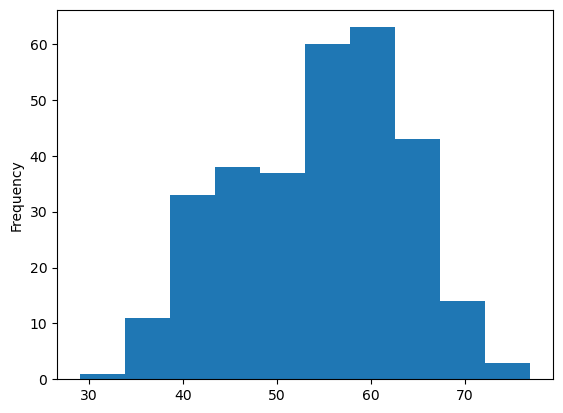

In [63]:
df.age.plot.hist();
#this is an excellent way to get a feel for your data having outliers as it will typically follow a normal distribution

### Heart Disease In Relation to Chest Pain Type
    -- Value 0: typical angina
    -- Value 1: atypical angina
    -- Value 2: non-anginal pain
    -- Value 3: asymptomatic

In [65]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [67]:
# Hmm this doesnt quite make sense looking at it. This might be a time to talk to a subject matter experct, as if we look at 0 or typical 
# angina  more do not have heart disease then do, and if we look at the rest they have more that have heart disease than not, despite being
# non-anginal or asymptomatic
#Lets look at it visually

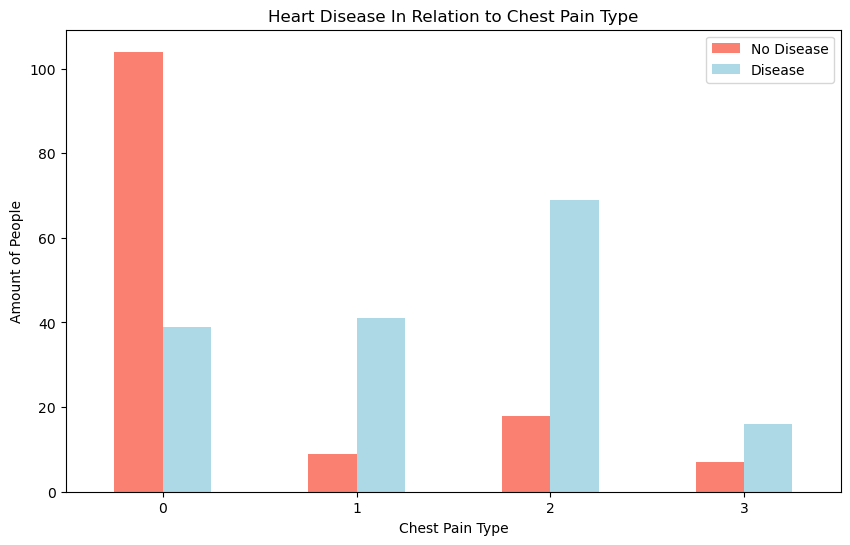

In [74]:
pd.crosstab(df.cp, df.target).plot(kind = "bar", 
                                   figsize =(10,6), color = ["salmon", "lightblue"]);
plt.title("Heart Disease In Relation to Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount of People")
plt.xticks(rotation="horizontal")
plt.legend(["No Disease", "Disease"]);

In [75]:
# Now that we have explored the data lets build a correlation Matrix or a table that shows us how each independant variable (all but target) 
#related to eachother.How do they interact is it positive, negative, etc.But remember correlation does not always mean causation.

In [76]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


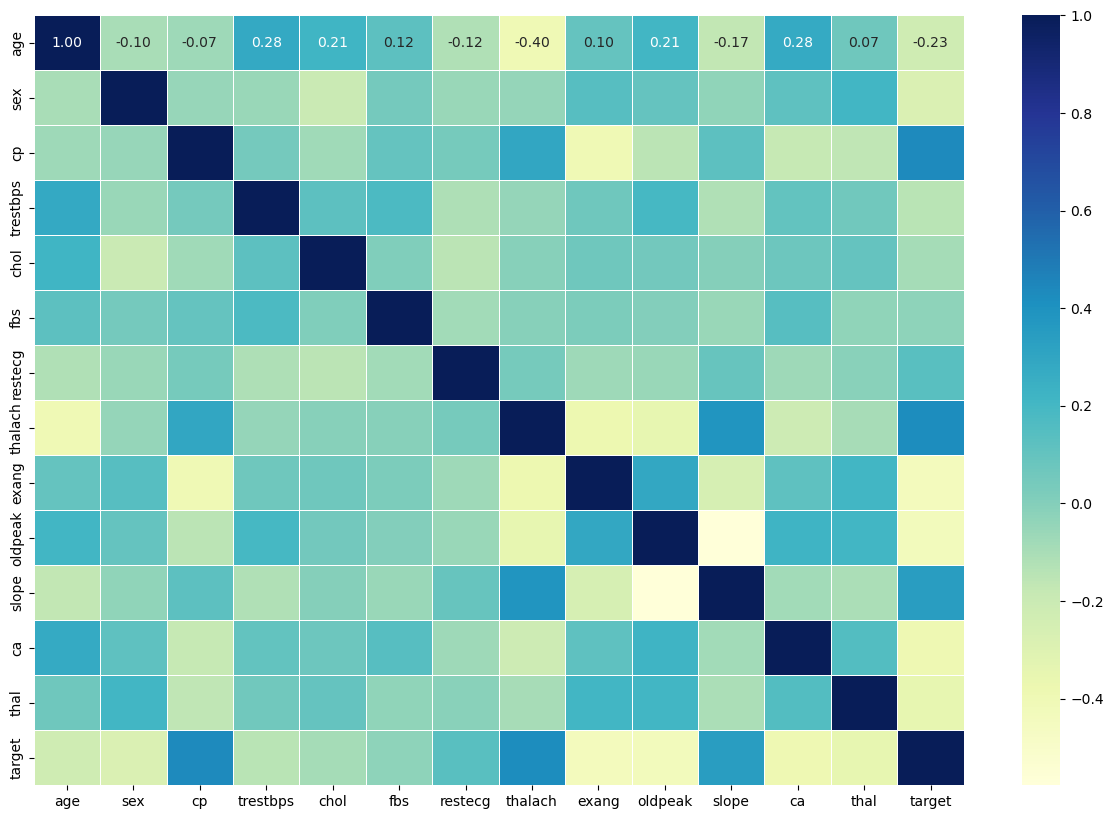

In [77]:
#lets use seaborn to make this a bit easier to understand
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax= sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f",
               cmap="YlGnBu")

In [79]:
# when looking at this perfect correlation is the column to column in the diagnal, As a reminder negative does not mean no correlation
#it means that as on increases the other decreases, 0 woulbe more of a no correclation

In [80]:
#something interesting if we look at exang, that is excersise induced angina so looking at the matrix we see that if they get angina due to 
#excersise their chances of heart disease goes down. 

## 5. Modelling 

In [82]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [91]:
# Split the data into X and Y 
X = df.drop("target", axis=1)
y = df["target"]

In [92]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [93]:
y


0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [94]:
# Now we split into test and train
